<a href="https://colab.research.google.com/github/Akshat13shah/STT_Ass1/blob/main/STT_CSE_ASS_2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pydriller


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 5.1 MB/s eta 0:00:00


In [ ]:
pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
import torch

print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")


PyTorch version: 2.6.0+cu124
CUDA available: True
GPU name: Tesla T4


part d

In [ ]:
import torch
import csv
import pandas as pd
from pydriller import Repository
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from huggingface_hub import login

# Login to Hugging Face


# Detect device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load model & tokenizer
tokenizer = AutoTokenizer.from_pretrained("mamiksik/CommitPredictorT5")
model = AutoModelForSeq2SeqLM.from_pretrained("mamiksik/CommitPredictorT5").to(device)

# File paths
repo_path = r"https://github.com/activeloopai/deeplake"
part_c_csv = "/content/drive/MyDrive/STT_CSE/bug_fixes.csv"
output_csv = "/content/drive/MyDrive/STT_CSE/diff_analysis.csv"


# Load CSV and get unique commit hashes
df = pd.read_csv(part_c_csv)
commit_list = df[['Hash', 'Message']]
total_commits = len(commit_list)

with open(output_csv, mode="w", newline="", encoding="utf-8") as out_file:
    writer = csv.writer(out_file)
    writer.writerow([
        "Hash", "Message", "Filename",
        "Source Before", "Source Current", "Diff",
        "Fix Type", "Rectified Message"
    ])

    processed_count = 0
    for _, row in commit_list.iterrows():
        processed_count += 1
        commit_hash = row["Hash"]
        commit_message = row["Message"]

        print(f"[{processed_count}/{total_commits}] Processing commit: {commit_hash}")

        for commit in Repository(repo_path, single=commit_hash).traverse_commits():
            for mod in commit.modified_files:
                before = mod.source_code_before or ""
                current = mod.source_code or ""
                diff = mod.diff or ""

                try:
                    inputs = tokenizer(diff, return_tensors="pt", truncation=True, max_length=512).to(device)
                    outputs = model.generate(**inputs, max_length=64)
                    fix_type = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()
                except Exception as e:
                    fix_type = f"ERROR: {e}"

                rectified = f"{commit_message} | [{fix_type}]"

                writer.writerow([
                    commit.hash,
                    commit_message,
                    mod.filename,
                    before,
                    current,
                    diff,
                    fix_type,
     ])

print(f"Diff analysis saved to {output_csv}")

Using device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

[1/2664] Processing commit: 268676b42215080ca3a6be283082f3e02de4eb64
[2/2664] Processing commit: 11616dbf1a0fec14ead2cbe531059ae50f101f2c
[3/2664] Processing commit: 031952c238e056341ac483f40c2c14633e4764ed
[4/2664] Processing commit: 93f249103a1a921e1462ab97195af95a6f7ef879
[5/2664] Processing commit: 64bf825400a100ddb420ebd32cadb7a9a760f132
[6/2664] Processing commit: 044782354567e57ba3926681659bdd6c6fa69fcf
[7/2664] Processing commit: 5200b820486c74f692f74b0430ce69168fa7db86
[8/2664] Processing commit: baac8237ab6756693e09f25e15da91c58c449c73
[9/2664] Processing commit: 81d34427d2b1f54ad1f5f8ac1e2afc8f0431cec1
[10/2664] Processing commit: ade640df275fda853b3a99a4b96d67be4b5d0e50
[11/2664] Processing commit: d45134ec7eede1fd9b3c3f654f4d690e13faaf6a
[12/2664] Processing commit: 12653a405ec64bdf7010af9503ceb2a6d6e46fd5
[13/2664] Processing commit: b26be34d0e692de41f3b8939a3b49bdce6c66ed4
[14/2664] Processing commit: 1b47e247e0e45e6b9e91a7bbef793cc96ad8c463
[15/2664] Processing commit: 

ValueError: SHA b'1bc0e1bb9d70e257819042ab1b12a1600cefbd9a' could not be resolved, git returned: b'1bc0e1bb9d70e257819042ab1b12a1600cefbd9a missing'

In [ ]:
import os
import csv
import pandas as pd
from pydriller import Repository
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from huggingface_hub import login

# Hugging Face login token (replace with your token)


# Detect device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load model & tokenizer
tokenizer = AutoTokenizer.from_pretrained("mamiksik/CommitPredictorT5")
model = AutoModelForSeq2SeqLM.from_pretrained("mamiksik/CommitPredictorT5").to(device)

# Local path to your cloned repo
repo_path = r"https://github.com/activeloopai/deeplake"  # Change if needed

# File paths
part_c_csv = "/content/drive/MyDrive/STT_CSE/bug_fixes.csv"
output_csv = "/content/drive/MyDrive/STT_CSE/diff_analysis.csv"

# Load all commits
commit_list = pd.read_csv(part_c_csv)
total_commits = len(commit_list)

# Determine last processed commit
if os.path.exists(output_csv):
    processed_df = pd.read_csv(output_csv)
    if not processed_df.empty:
        last_processed_hash = processed_df["Hash"].iloc[-1]
        last_processed_index = commit_list.index[commit_list["Hash"] == last_processed_hash].tolist()
        if last_processed_index:
            last_processed_index = last_processed_index[0]
        else:
            print("Warning: last processed commit hash not found in commit list. Starting from scratch.")
            last_processed_index = -1
    else:
        last_processed_index = -1
else:
    last_processed_index = -1

print(f"Last processed commit index: {last_processed_index}")

# Slice commits from next one onward
unprocessed_commits = commit_list.iloc[last_processed_index + 1 :].reset_index(drop=True)
remaining_commits = len(unprocessed_commits)
already_processed_count = last_processed_index + 1

print(f"Total commits: {total_commits}")
print(f"Already processed: {already_processed_count}")
print(f"Remaining to process: {remaining_commits}")

# Open CSV in append mode
with open(output_csv, mode="a", newline="", encoding="utf-8") as out_file:
    writer = csv.writer(out_file)
    # If file was just created and empty, write header
    if os.path.getsize(output_csv) == 0:
        writer.writerow([
            "Hash", "Message", "Filename",
            "Source Before", "Source Current", "Diff",
            "Fix Type", "Rectified Message"
        ])

    for idx, row in unprocessed_commits.iterrows():
        commit_hash = row["Hash"]
        commit_message = row["Message"]

        current_count = idx + 1 + already_processed_count
        print(f"[{current_count}/{total_commits}] Processing commit: {commit_hash}")

        try:
            for commit in Repository(repo_path, single=commit_hash).traverse_commits():
                for mod in commit.modified_files:
                    try:
                        before = mod.source_code_before or ""
                        current = mod.source_code or ""
                        diff = mod.diff or ""

                        inputs = tokenizer(diff, return_tensors="pt", truncation=True, max_length=512).to(device)
                        outputs = model.generate(**inputs, max_length=64)
                        fix_type = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()

                        rectified = f"{commit_message} | [{fix_type}]"

                        writer.writerow([
                            commit.hash,
                            commit_message,
                            mod.filename,
                            before,
                            current,
                            diff,
                            fix_type,
                            rectified
                        ])
                    except ValueError as ve:
                        print(f"ValueError at commit {commit_hash}, file {mod.filename}: {ve}")
                        continue
                    except Exception as e:
                        print(f"Error at commit {commit_hash}, file {mod.filename}: {e}")
                        continue

        except Exception as e:
            print(f"Skipping commit {commit_hash} due to error: {e}")
            continue

print(f"Diff analysis saved/appended to {output_csv}")



Using device: cuda
Last processed commit index: 1587
Total commits: 2664
Already processed: 1588
Remaining to process: 1076
[1589/2664] Processing commit: 00bc455bde4f6de958ecdc8405e29dfde00a0454
[1590/2664] Processing commit: cb8ce6414306d3d0d1d9fbdb9d93a77805cbd33c
[1591/2664] Processing commit: dfe8d93d3a99d19db6d6997e9ca586f098cf00f0
[1592/2664] Processing commit: 1f26f466272079a80ce5ec61a28b07c99b7904a4
[1593/2664] Processing commit: 8e5f1fe2f709793b23523e7f0ea7b3160acd5a9b
[1594/2664] Processing commit: 37ed758262e7aa8294767b8c28fa57dddcec88ba
[1595/2664] Processing commit: c7ef318502cf17d700bfa917df7c4710cd0c9fba
[1596/2664] Processing commit: 728a56d64ec2c7225f2e799579c885ad855dbd82
[1597/2664] Processing commit: 34634c49fe7446a300d628569448b6cb553c5e8b
[1598/2664] Processing commit: d9cc219c5945855ab61e5d855483f6875649ea5b
[1599/2664] Processing commit: 7e709d8965daac838994f3bdf002de59e6ef9aa6
[1600/2664] Processing commit: 03d06d6423345cfb302b93838d85c91252fbddb0
[1601/2664] 

In [ ]:
import pandas as pd

output_csv = "/content/drive/MyDrive/STT_CSE/diff_analysis.csv"

df = pd.read_csv(output_csv)

# Total count of all hash entries (including duplicates)
total_hashes_count = df["Hash"].nunique()
print(f"Total hash entries (including duplicates): {total_hashes_count}")

# Optional: Count how many times each commit hash appears
hash_counts = df["Hash"].value_counts()
print(hash_counts)



Total hash entries (including duplicates): 1909
Hash
bfdbe7305045b8e64783b29afaa4400bced64fb0    112
cc5c3b689c2833c756dd83424726734350b0f72a    100
1b47e247e0e45e6b9e91a7bbef793cc96ad8c463     52
46712009f53bdab7bbd904469cea4d39f5e8112b     41
67400ac836b1e363bc49143880a487a18e96a8a8     40
                                           ... 
e4c35085f71bc0fc3a7092e35fe0b983f45df5c5      1
a07f3c4962206d81ec49736ab0e42073863d992d      1
7042e999b78c67d071541deb365c49aaa4a4b9f2      1
f5b1bbb55a01a7f28083f5aa0e6970f5863f207d      1
ba97f19182dc778014fdb249a1fed65ca2d569fd      1
Name: count, Length: 1909, dtype: int64


In [ ]:
import pandas as pd

commit_list = pd.read_csv("/content/drive/MyDrive/STT_CSE/bug_fixes.csv")
output_df = pd.read_csv("/content/drive/MyDrive/STT_CSE/diff_analysis.csv")

all_hashes = set(commit_list["Hash"])
processed_hashes = set(output_df["Hash"])

missing_hashes = all_hashes - processed_hashes

print(f"Total commits in commit list: {len(all_hashes)}")
print(f"Unique commits in output: {len(processed_hashes)}")
print(f"Commits missing in output: {len(missing_hashes)}")

print("Some missing commit hashes:", list(missing_hashes)[:10])


Total commits in commit list: 2664
Unique commits in output: 2229
Commits missing in output: 435
Some missing commit hashes: ['a50cc6e5b24c5349a75a5d88b3e6652b3421d465', '57f77c81c5441c366f9994079ca5b92ed662cc62', '4a017228988fa6718640eb1476a69e8396aefb75', '5d9675d5ee7cb54b81dbc7fed2cc0105c76408b7', 'e4503aa64e0fd49d5143a762cad550ad2f921334', '65dd6098fa523786e23af2bd392f7e787cb4b918', '0cc1034a1e1f80d800757b43b7ae99a389ed2387', 'a79014364c84902e7374246c1dfb932e81dfb303', '64c8f83ddf2380ca8526217c193be45b88b1e7a5', 'f2e0493573b23dd5cf6f4639097974cddd92358a']


In [ ]:
import os
import csv
import pandas as pd
from pydriller import Repository
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from huggingface_hub import login

# Hugging Face login token (replace with your token)


# Detect device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load model & tokenizer
tokenizer = AutoTokenizer.from_pretrained("mamiksik/CommitPredictorT5")
model = AutoModelForSeq2SeqLM.from_pretrained("mamiksik/CommitPredictorT5").to(device)

# Local path to your cloned repo
repo_path = r"https://github.com/activeloopai/deeplake"  # Change if needed

# File paths
part_c_csv = "/content/drive/MyDrive/STT_CSE/bug_fixes.csv"
output_csv = "/content/drive/MyDrive/STT_CSE/diff_analysis.csv"

# Load all commits
commit_list = pd.read_csv(part_c_csv)
total_commits = len(commit_list)

# Load processed commits if output CSV exists
if os.path.exists(output_csv):
    processed_df = pd.read_csv(output_csv)
    processed_hashes = set(processed_df["Hash"])
else:
    processed_hashes = set()

# Find missing commits
all_hashes = set(commit_list["Hash"])
missing_hashes = list(all_hashes - processed_hashes)

print(f"Total commits: {total_commits}")
print(f"Already processed commits: {len(processed_hashes)}")
print(f"Missing commits to process: {len(missing_hashes)}")

# Filter commit_list to only missing commits, preserve original order
missing_commits_df = commit_list[commit_list["Hash"].isin(missing_hashes)].reset_index(drop=True)

# Open CSV in append mode
with open(output_csv, mode="a", newline="", encoding="utf-8") as out_file:
    writer = csv.writer(out_file)
    # If file was just created and empty, write header
    if os.path.getsize(output_csv) == 0:
        writer.writerow([
            "Hash", "Message", "Filename",
            "Source Before", "Source Current", "Diff",
            "Fix Type", "Rectified Message"
        ])

    for idx, row in missing_commits_df.iterrows():
        commit_hash = row["Hash"]
        commit_message = row["Message"]

        # Progress count = processed + current idx +1
        current_count = len(processed_hashes) + idx + 1
        print(f"[{current_count}/{total_commits}] Processing commit: {commit_hash}")

        try:
            for commit in Repository(repo_path, single=commit_hash).traverse_commits():
                for mod in commit.modified_files:
                    try:
                        before = mod.source_code_before or ""
                        current = mod.source_code or ""
                        diff = mod.diff or ""

                        inputs = tokenizer(diff, return_tensors="pt", truncation=True, max_length=512).to(device)
                        outputs = model.generate(**inputs, max_length=64)
                        fix_type = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()

                        rectified = f"{commit_message} | [{fix_type}]"

                        writer.writerow([
                            commit.hash,
                            commit_message,
                            mod.filename,
                            before,
                            current,
                            diff,
                            fix_type,
                            rectified
                        ])
                    except Exception as e:
                        print(f"Error processing file {mod.filename} in commit {commit_hash}: {e}")
                        continue

        except Exception as e:
            print(f"Skipping commit {commit_hash} due to error: {e}")
            continue

print(f"Finished processing all missing commits. Output saved/appended to {output_csv}")


Using device: cpu


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

Total commits: 2664
Already processed commits: 1909
Missing commits to process: 755
[1910/2664] Processing commit: 13d372caaeaee7f65dbb42c450aeb955bdcc0ec7
[1911/2664] Processing commit: 78ad6393cdfda61ae2f5c5b0458725dc3cebf990
[1912/2664] Processing commit: 5bfe2a06c9c0c84bad35aeb54095eaa438b351f5
[1913/2664] Processing commit: d137323440985a511ed9a52a732622844e0b9e16
[1914/2664] Processing commit: 1dd4596ae04e085c8572152ca36c39bbbbe8eef9
[1915/2664] Processing commit: f920d41ae2c2fb219e76d33700c8e0994b7d1fd5
[1916/2664] Processing commit: 07b692b69c91cf13cce0b331e774200d49cca374
[1917/2664] Processing commit: b2d6740f03d027324e097e1224ce26dfa6da15c3
[1918/2664] Processing commit: 2be981ef0ccb0d23d22f61330d906a5c71f2ee71
[1919/2664] Processing commit: 2f2f613b9226648ea5b83ebe3283f148315ca9c4
[1920/2664] Processing commit: 3660640a655f41f324db5f80c279ac10dbdc377c
[1921/2664] Processing commit: ae446cd59e5f506f7be52d3c2de43386c83579cf
[1922/2664] Processing commit: 4c8055a27cf9d11bc496e

In [ ]:
from concurrent.futures import ThreadPoolExecutor
from pydriller import Repository

repo_path = r"https://github.com/activeloopai/deeplake"
missing_commits = list(missing_hashes)  # your missing commit hashes list

def check_commit(chash):
    try:
        commit = next(Repository(repo_path, single=chash).traverse_commits())
        if len(commit.modified_files) == 0:
            return chash
    except Exception as e:
        print(f"Error processing commit {chash}: {e}")
    return None

no_mod_files = []
total = len(missing_commits)

with ThreadPoolExecutor(max_workers=8) as executor:
    futures = {executor.submit(check_commit, chash): chash for chash in missing_commits}
    checked = 0
    for future in futures:
        checked += 1
        result = future.result()
        if result:
            no_mod_files.append(result)
        if checked % 10 == 0 or checked == total:
            print(f"Checked {checked}/{total} commits...")

print(f"Commits with no modified files: {len(no_mod_files)}")
print("Example commit hashes with no modifications:", no_mod_files[:10])


Checked 10/435 commits...
Checked 20/435 commits...
Checked 30/435 commits...
Checked 40/435 commits...
Checked 50/435 commits...
Checked 60/435 commits...
Checked 70/435 commits...
Checked 80/435 commits...
Checked 90/435 commits...
Checked 100/435 commits...
Checked 110/435 commits...
Checked 120/435 commits...
Checked 130/435 commits...
Checked 140/435 commits...
Checked 150/435 commits...
Checked 160/435 commits...
Checked 170/435 commits...
Checked 180/435 commits...
Checked 190/435 commits...
Checked 200/435 commits...
Checked 210/435 commits...
Checked 220/435 commits...
Checked 230/435 commits...
Checked 240/435 commits...
Error processing commit 203224d58d73b1637302e028882ee127e08da209: Cmd('git') failed due to: exit code(128)
  cmdline: git diff-tree 1077dd36147e4cf7e9e1522d4b399c95d30bfb65 203224d58d73b1637302e028882ee127e08da209 -r --abbrev=40 --full-index -M -p --no-ext-diff --no-color
Checked 250/435 commits...
Checked 260/435 commits...
Checked 270/435 commits...
Checked

In [ ]:
import pandas as pd

output_csv = "/content/drive/MyDrive/STT_CSE/diff_analysis.csv"

df = pd.read_csv(output_csv)

total_rows = len(df)                   # total file changes processed
unique_commits = df["Hash"].nunique() # unique commits processed

print(f"Total rows in output CSV (all processed files): {total_rows}")
print(f"Unique commits processed (in output CSV): {unique_commits}")


Total rows in output CSV (all processed files): 6100
Unique commits processed (in output CSV): 2229


In [ ]:
import pandas as pd

inout_csv = "/content/drive/MyDrive/STT_CSE/bug_fixes.csv"
df1 = pd.read_csv(inout_csv)
len(df1)        # total data rows
df1.shape[0]
print(f"Total rows (excluding header): {len(df1)}")
print(f"Total lines in file (including header): {len(df1) + 1}")


Total rows (excluding header): 2664
Total lines in file (including header): 2665


In [ ]:
result = df1[df1['Hash'] == 'fc8ca1b425df6a837a9f8dc64abb5aaad580db4b']
print(result)

                                         Hash  \
555  fc8ca1b425df6a837a9f8dc64abb5aaad580db4b   

                                               Message  \
555  adds option for no compression, to_tf subset w...   

                                Parent Hashes  Is Merge Commit  \
555  fbc6f598d87e043b32dd955978d1bebd23f67aec            False   

                                        Modified Files  
555  gradient_health.py;LICENSE;README.md;augmenter...  


In [ ]:
import pandas as pd

output_csv = "/content/drive/MyDrive/STT_CSE/diff_analysis.csv"
df = pd.read_csv(output_csv)
len(df)        # total data rows
df.shape[0]
print(f"Total rows (excluding header): {len(df)}")
print(f"Total lines in file (including header): {len(df) + 1}")
# Find all complete duplicate rows
duplicates = df[df.duplicated(keep=False)]

# See how many duplicates
print(f"Number of duplicate rows (excluding the first occurrence of each group): {df.duplicated().sum()}")
print(f"Number of total duplicate entries (counting all repeats): {len(duplicates)}")

# Preview the duplicates
print(duplicates)

# print(df.iloc[5999])

Total rows (excluding header): 6100
Total lines in file (including header): 6101
Number of duplicate rows (excluding the first occurrence of each group): 16
Number of total duplicate entries (counting all repeats): 24
                                          Hash  \
721   aaf7f9dcaa33bfe6049e1bcebfc6f95d11e63c87   
724   aaf7f9dcaa33bfe6049e1bcebfc6f95d11e63c87   
725   aaf7f9dcaa33bfe6049e1bcebfc6f95d11e63c87   
1243  9650105dfae8bfe0af52dd1ebe28651d5c9c2355   
1247  9650105dfae8bfe0af52dd1ebe28651d5c9c2355   
1379  68f9aadd19cb8e1eab5f1c31d2ab23510d3f4c23   
1380  68f9aadd19cb8e1eab5f1c31d2ab23510d3f4c23   
1639  b28fe3dfc9ec06a4d2d52705bcd23d5408b31370   
1641  b28fe3dfc9ec06a4d2d52705bcd23d5408b31370   
2107  0b4bb098f37fe8307d3637a73444371ae8b53dd1   
2109  0b4bb098f37fe8307d3637a73444371ae8b53dd1   
2293  8ca6b6c5425752c6cb30750b96ca2c89e8fe054c   
2294  8ca6b6c5425752c6cb30750b96ca2c89e8fe054c   
2295  8ca6b6c5425752c6cb30750b96ca2c89e8fe054c   
2296  8ca6b6c5425752c6cb30750b96

In [ ]:
df[787:800]

,Hash,Message,Filename,Source Before,Source Current,Diff,Fix Type,Rectified Message
787,7b828c4a50ba15833290f7a9bda61619d1164257,fixes to setitem,datasetview.py,from hub.api.tensorview import TensorView\nfro...,from hub.api.tensorview import TensorView\nfro...,"@@ -1,6 +1,7 @@\n from hub.api.tensorview impo...",add examples for datasetview,NaN
788,7b828c4a50ba15833290f7a9bda61619d1164257,fixes to setitem,tensorview.py,import hub\nimport collections.abc as abc\nfro...,import hub\nimport collections.abc as abc\nfro...,"@@ -1,6 +1,6 @@\n import hub\n import collecti...",add examples for image-to-n-th element,NaN
789,7b828c4a50ba15833290f7a9bda61619d1164257,fixes to setitem,test_dataset.py,import os\nfrom hub.cli.auth import login_fn\n...,import os\nfrom hub.cli.auth import login_fn\n...,"@@ -520,6 +520,29 @@ def test_dataset_setting_...",add test for datasetview and datasetassignvalue,NaN
790,7b828c4a50ba15833290f7a9bda61619d1164257,fixes to setitem,dynamic_tensor.py,import collections.abc as abc\nfrom hub.schema...,import collections.abc as abc\nfrom hub.schema...,"@@ -189,7 +189,7 @@ class DynamicTensor:\n ...",fix padding in dynamic tensor,NaN
791,b836b9b8c0b1443cb2fe4440ee08cf76884b6b85,fix linting,features.py,"from typing import Tuple, Dict, Iterable\n\nim...","from typing import Tuple, Dict, Iterable\n\nim...","@@ -129,7 +129,9 @@ class Tensor(HubSchema):\n...",add missing check,NaN
792,4e13bb448f72a01e2cc18faff743bc663e310cbf,bugfix 373,feature_request.md,---\nname: Feature request\nabout: Suggest an ...,---\nname: Feature request\nabout: Suggest an ...,"@@ -9,7 +9,7 @@ assignees: ''\n \n ## 🚨🚨 Featu...",add missing comma,NaN
793,f78764c0cac6f72b105444866e524d55e5d87260,bugfix 373,feature_request.md,---\nname: Feature request\nabout: Suggest an ...,---\nname: Feature request\nabout: Suggest an ...,"@@ -9,7 +9,7 @@ assignees: ''\n \n ## 🚨🚨 Featu...",add missing comment,NaN
794,bd3f7e95bb32870589b8e2c6ce60cee636010532,bugfix 373,feature_request.md,---\nname: Feature request\nabout: Suggest an ...,---\nname: Feature request\nabout: Suggest an ...,"@@ -9,7 +9,7 @@ assignees: ''\n \n ## 🚨🚨 Featu...",add missing comment,NaN
795,d9363616d67dc4df34cb7360e111ec14a6b33566,fix linting,test_dataset.py,import os\nfrom hub.cli.auth import login_fn\n...,import os\nfrom hub.cli.auth import login_fn\n...,"@@ -546,16 +546,18 @@ def test_dataset_casting...",add test for dataset casting,NaN
796,fed29a9e299061409f1652e31c66ffdacd8e5bea,"meta_info bug fixed, when there is no meta_inf...",dataset.py,import os\nimport posixpath\nimport collection...,import os\nimport posixpath\nimport collection...,"@@ -150,7 +150,7 @@ class Dataset:\n ...",update dataset.py,NaN


part e

In [ ]:
!pip install -U transformers accelerate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.7/374.7 kB 10.4 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.9.0
    Uninstalling accelerate-1.9.0:
      Successfully uninstalled accelerate-1.9.0


In [ ]:
import transformers
print(transformers.__version__)



4.55.0


In [ ]:
!pip install sympy==1.12


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 45.0 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.12 which is incompatible.


In [ ]:
import pandas as pd
import sys
import os

# === Rectifier Function ===
def formulate_rectifier(developer_msg, filename, fix_type):
    """
    Formulates a rectified commit message based on the developer's message,
    the file being changed, and the LLM-inferred fix type.
    """
    # Check if developer message is specific and descriptive
    generic_messages = [
        "bug fix", "fix bug", "bugfix", "bugfixes",
        "minor changes", "minor updates", "misc", "fixes",
        "update", "improvement", "fix"
    ]

    # A simple check to see if the developer's message is a generic one.
    msg_lower = developer_msg.lower().strip()
    is_generic = any(term in msg_lower for term in generic_messages)

    # If the message is already descriptive, use it as is.
    if len(developer_msg.split()) > 4 and not is_generic:
        return developer_msg.strip()

    # If the message is short or generic, formulate a new one.
    # The new message should be concise and combine the fix type and filename.
    if fix_type:
        # Construct the new message using the Fix Type and Filename
        rectified_message = f"{fix_type.strip()} in {filename.strip()}"
        return rectified_message
    else:
        # If no Fix Type, just append filename to the original message.
        return f"{developer_msg.strip()} in {filename.strip()}"

# === Main Script ===
def process_csv(input_path, output_path):
    """
    Loads a CSV, processes each row to rectify commit messages, and saves the result.
    """
    # Load CSV file
    if not os.path.exists(input_path):
        print(f"Error: CSV file not found at {input_path}")
        return

    try:
        df = pd.read_csv(input_path)
    except Exception as e:
        print(f"Error loading CSV file: {e}")
        return

    # Ensure required columns exist
    required_columns = ["Message", "Filename", "Fix Type"]
    for col in required_columns:
        if col not in df.columns:
            print(f"Error: Missing required column '{col}' in the CSV file.")
            return

    # Add 'Rectified Message' column if it doesn't exist
    if "Rectified Message" not in df.columns:
        df["Rectified Message"] = ""

    total_rows = len(df)
    print(f"Processing {total_rows} rows from '{input_path}'...")

    # Loop through each row to process the messages
    for idx, row in df.iterrows():
        # Get data from the row, handling potential missing values
        developer_msg = str(row["Message"]).strip()
        filename = str(row["Filename"]).strip()
        fix_type = str(row["Fix Type"]).strip()

        # Rectify the message and update the DataFrame
        rectified = formulate_rectifier(developer_msg, filename, fix_type)
        df.at[idx, "Rectified Message"] = rectified

        # Save the file periodically for checkpointing
        if (idx + 1) % 50 == 0 or (idx + 1) == total_rows:
            df.to_csv(output_path, index=False)
            sys.stdout.write(f"\rProgress: {idx + 1}/{total_rows} rows processed.")
            sys.stdout.flush()

    print(f"\n Done! Rectified CSV saved to: {output_path}")

# === Run ===
if __name__ == "__main__":
    # input_csv = "your_input_file.csv"  # Replace with the path to your file
    # output_csv = "rectified_messages.csv" # Replace with your desired output path

    # You might need to adjust these paths
    # For example, if you are using Google Colab:
    input_csv = "/content/drive/MyDrive/STT_CSE/diff_analysis.csv"
    output_csv = "/content/drive/MyDrive/STT_CSE/rectified_final.csv"

    process_csv(input_csv, output_csv)

Processing 6100 rows from '/content/drive/MyDrive/STT_CSE/diff_analysis.csv'...
Progress: 6100/6100 rows processed.
 Done! Rectified CSV saved to: /content/drive/MyDrive/STT_CSE/rectified_final.csv


In [2]:
import pandas as pd

df="/content/drive/MyDrive/STT_CSE/rectified_final.csv"
df=pd.read_csv(df)

In [7]:
processed_hashes = set(df["Hash"])
len(processed_hashes)

2229

In [3]:
df

,Hash,Message,Filename,Source Before,Source Current,Diff,Fix Type,Rectified Message
0,268676b42215080ca3a6be283082f3e02de4eb64,fix pip upload,publish_pip.sh,rm -rf dist hub_array.egg-info\npython3 setup....,rm -rf dist hub.egg-info\npython3 setup.py sdi...,"@@ -1,3 +1,3 @@\n-rm -rf dist hub_array.egg-in...",remove missing dist-info,remove missing dist-info in publish_pip.sh
1,11616dbf1a0fec14ead2cbe531059ae50f101f2c,bugfixes,interface.py,"from bbox import Bbox, chunknames, shade, Vec,...","from bbox import Bbox, chunknames, shade, Vec,...","@@ -44,7 +44,7 @@ class TensorInterface(object...",add missing docstrings,add missing docstrings in interface.py
2,11616dbf1a0fec14ead2cbe531059ae50f101f2c,bugfixes,storage.py,import boto3\nimport botocore\nimport tenacity...,import boto3\nimport botocore\nimport tenacity...,"@@ -39,7 +39,7 @@ class S3(Storage):\n ...",add retry to s3_object_list,add retry to s3_object_list in storage.py
3,031952c238e056341ac483f40c2c14633e4764ed,exception handling,docker-compose.yaml,version: '2'\n\nservices:\n hub:\n build:\...,version: '2'\n\nservices:\n test:\n build:...,"@@ -1,15 +1,14 @@\n version: '2'\n \n services...",add missing line after hub array,add missing line after hub array in docker-com...
4,031952c238e056341ac483f40c2c14633e4764ed,exception handling,exceptions.py,"\nclass OutOfBoundsError(Exception):\n """"""R...","\nclass OutOfBoundsError(Exception):\n """"""R...","@@ -1,4 +1,20 @@\n \n class OutOfBoundsError(E...",add missing docstring,add missing docstring in exceptions.py
...,...,...,...,...,...,...,...,...
6095,e3f11a8b5bd5f9b21dda3837db7fcde304e20a50,minor changes,chunk_engine.py,from collections import OrderedDict\nfrom deep...,from collections import OrderedDict\nfrom deep...,"@@ -838,26 +838,27 @@ class ChunkEngine:\n ...",add missing docstrings,add missing docstrings in chunk_engine.py
6096,e3f11a8b5bd5f9b21dda3837db7fcde304e20a50,minor changes,test_indra_dataset.py,import deeplake\nimport numpy as np\nfrom deep...,import deeplake\nimport numpy as np\nfrom deep...,"@@ -17,7 +17,7 @@ def test_indexing(local_auth...",add tests for the new example,add tests for the new example in test_indra_da...
6097,e3f11a8b5bd5f9b21dda3837db7fcde304e20a50,minor changes,exceptions.py,import requests\nimport numpy as np\nfrom typi...,import requests\nimport numpy as np\nfrom typi...,"@@ -1159,3 +1159,8 @@ class InvalidAuthContext...",add missing docstring,add missing docstring in exceptions.py
6098,8ade86587d8a94a8d0f1372792d2150c9ddce761,Fixed readme links (#2975),README.md,"<img src=""https://static.scarf.sh/a.png?x-pxid...","<img src=""https://static.scarf.sh/a.png?x-pxid...","@@ -71,16 +71,16 @@ pip install deeplake\n \n ...",add missing docs,add missing docs in README.md


part f

In [8]:
import re

# Define generic/low-information messages
generic_terms = [
    "fix bug", "bug fix", "update", "minor changes", "misc",
    "bugfix", "bugfixes", "improvement", "fix"
]

def is_precise(message, filename, diff):
    msg = str(message).lower().strip()
    if not msg or any(term in msg for term in generic_terms):
        return 0  # not precise

    # Check if filename appears in message
    filename_stem = filename.split("/")[-1].replace(".py", "").lower()
    if filename_stem in msg:
        return 1

    # Check token overlap with diff
    msg_tokens = set(re.findall(r"[a-zA-Z_]\w+", msg))
    diff_tokens = set(re.findall(r"[a-zA-Z_]\w+", str(diff)))
    if len(msg_tokens & diff_tokens) > 1:
        return 1

    return 0


In [9]:
df["Dev_Precise"] = df.apply(lambda r: is_precise(r["Message"], r["Filename"], r["Diff"]), axis=1)
df["LLM_Precise"] = df.apply(lambda r: is_precise(r["Fix Type"], r["Filename"], r["Diff"]), axis=1)
df["Rect_Precise"] = df.apply(lambda r: is_precise(r["Rectified Message"], r["Filename"], r["Diff"]), axis=1)

# Show how many precise cases for each
print("Developer precise rate:", df["Dev_Precise"].mean())
print("LLM precise rate:", df["LLM_Precise"].mean())
print("Rectified precise rate:", df["Rect_Precise"].mean())


Developer precise rate: 0.05360655737704918
LLM precise rate: 0.2875409836065574
Rectified precise rate: 0.828032786885246


In [10]:
dev_rate = df["Dev_Precise"].mean()
print(f"RQ1 → Developer precise hit rate: {dev_rate:.2%}")


RQ1 → Developer precise hit rate: 5.36%


In [11]:
llm_rate = df["LLM_Precise"].mean()
print(f"RQ2 → LLM precise hit rate: {llm_rate:.2%}")


RQ2 → LLM precise hit rate: 28.75%


In [12]:
rect_rate = df["Rect_Precise"].mean()
print(f"RQ3 → Rectifier precise hit rate: {rect_rate:.2%}")


RQ3 → Rectifier precise hit rate: 82.80%


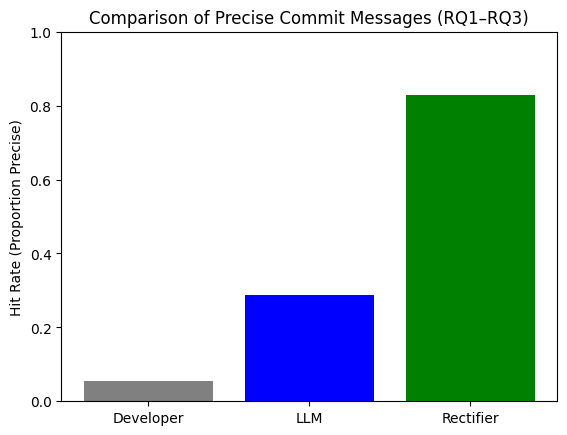

In [13]:
import matplotlib.pyplot as plt

rates = [dev_rate, llm_rate, rect_rate]
labels = ["Developer", "LLM", "Rectifier"]

plt.bar(labels, rates, color=["gray", "blue", "green"])
plt.ylabel("Hit Rate (Proportion Precise)")
plt.title("Comparison of Precise Commit Messages (RQ1–RQ3)")
plt.ylim(0, 1)
plt.show()


In [14]:
sample = df.sample(50, random_state=42)  # pick 50 random rows
sample.to_csv("manual_eval_sample.csv", index=False)


In [5]:

import nbformat

filename = "/content/drive/MyDrive/Colab Notebooks/STT_CSE_ASS_2_final.ipynb"   # change if you renamed the file

with open(filename) as f:
    nb = nbformat.read(f, as_version=4)

if "widgets" in nb["metadata"] and "state" not in nb["metadata"]["widgets"]:
    nb["metadata"]["widgets"]["state"] = {}

fixed_file = filename.replace(".ipynb", "_fixed.ipynb")
with open(fixed_file, "w") as f:
    nbformat.write(nb, f)

print("✅ Fixed file saved as:", fixed_file)


✅ Fixed file saved as: /content/drive/MyDrive/Colab Notebooks/STT_CSE_ASS_2_final_fixed.ipynb


In [7]:

import nbformat
filename = "/content/drive/MyDrive/Colab Notebooks/STT_CSE_ASS_2_final.ipynb"

with open(filename) as f:
    nb = nbformat.read(f, as_version=4)

print(nb["metadata"].get("widgets", "No widgets metadata"))

{'application/vnd.jupyter.widget-state+json': {'59b24903aa1443c5bd73a15ca6475f0e': {'model_module': '@jupyter-widgets/controls', 'model_name': 'HBoxModel', 'model_module_version': '1.5.0', 'state': {'_dom_classes': [], '_model_module': '@jupyter-widgets/controls', '_model_module_version': '1.5.0', '_model_name': 'HBoxModel', '_view_count': None, '_view_module': '@jupyter-widgets/controls', '_view_module_version': '1.5.0', '_view_name': 'HBoxView', 'box_style': '', 'children': ['IPY_MODEL_4ed2cc980d9c43e09b846968158d2e1d', 'IPY_MODEL_4859d2e54c5e40f5b6bf5146c39d0868', 'IPY_MODEL_903aab5aa3c14ba8a03326ff7f293780'], 'layout': 'IPY_MODEL_e34c56bd6d434548aba98b5ae83dfcf6'}}, '4ed2cc980d9c43e09b846968158d2e1d': {'model_module': '@jupyter-widgets/controls', 'model_name': 'HTMLModel', 'model_module_version': '1.5.0', 'state': {'_dom_classes': [], '_model_module': '@jupyter-widgets/controls', '_model_module_version': '1.5.0', '_model_name': 'HTMLModel', '_view_count': None, '_view_module': '@ju

In [8]:

import nbformat

filename = "/content/drive/MyDrive/Colab Notebooks/STT_CSE_ASS_2_final.ipynb"

# Read notebook
with open(filename) as f:
    nb = nbformat.read(f, as_version=4)

# Remove widgets metadata entirely
if "widgets" in nb["metadata"]:
    del nb["metadata"]["widgets"]

# Save cleaned version
fixed_file = filename.replace(".ipynb", "_fixed.ipynb")
with open(fixed_file, "w") as f:
    nbformat.write(nb, f)

print("✅ Cleaned notebook saved as:", fixed_file)



✅ Cleaned notebook saved as: /content/drive/MyDrive/Colab Notebooks/STT_CSE_ASS_2_final_fixed.ipynb


In [10]:
import nbformat

filename = "/content/drive/MyDrive/Colab Notebooks/STT_CSE_ASS_2_final.ipynb"

with open(filename) as f:
    nb = nbformat.read(f, as_version=4)

# Case 1: top-level widgets
if "widgets" in nb.metadata:
    widgets = nb.metadata["widgets"]

    # Case 2: nested widget state
    if "application/vnd.jupyter.widget-state+json" in widgets:
        widget_state = widgets["application/vnd.jupyter.widget-state+json"]
        if "state" not in widget_state:
            widget_state["state"] = {}
        nb.metadata["widgets"]["application/vnd.jupyter.widget-state+json"] = widget_state
    else:
        # If it's malformed or not needed, just remove it
        del nb.metadata["widgets"]

fixed_file = filename.replace(".ipynb", "_fixed.ipynb")
with open(fixed_file, "w") as f:
    nbformat.write(nb, f)

print("✅ Saved fixed notebook as:", fixed_file)


✅ Saved fixed notebook as: /content/drive/MyDrive/Colab Notebooks/STT_CSE_ASS_2_final_fixed.ipynb
